<a href="https://colab.research.google.com/github/prxska/Ev3MachineLearning/blob/main/SupportVectorMachine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Support Vector Machine



In [1]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022.csv


<ipython-input-1-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


In [2]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar outliers en MatchKills
limite = df['MatchKills'].quantile(0.99)
df_filtrado = df[df['MatchKills'] < limite].copy()

# Definir variables predictoras
features = [
    'RoundStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'MatchAssists',
    'TravelledDistance'
]
X = df_filtrado[features]
y = df_filtrado['MatchKills']

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo SVR con escalado
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10, epsilon=0.2))
svr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = svr_model.predict(X_test)
print("MSE (SVR):", mean_squared_error(y_test, y_pred))
print("R² (SVR):", r2_score(y_test, y_pred))


MSE (SVR): 25.19788266083458
R² (SVR): 0.27818341397731616


Con un R² de 0.278, el SVR es capaz de explicar casi el 28% de la variabilidad en las kills de los jugadores.

La normalización previa fue clave para que el SVR funcione correctamente.

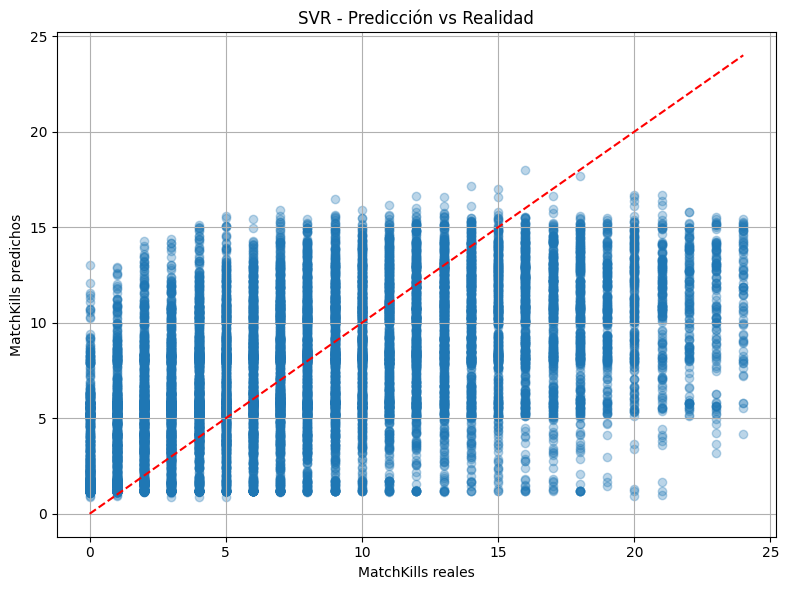

In [4]:

# Limpieza y conversión
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'].astype(str).str.replace('.', '', regex=False), errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar nulos necesarios
df = df.dropna(subset=[
    'TravelledDistance', 'RoundStartingEquipmentValue',
    'MatchKills', 'MatchAssists', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown'
])

# Filtrar outliers
limite = df['MatchKills'].quantile(0.99)
df_filtrado = df[df['MatchKills'] < limite].copy()

# Variables
features = [
    'RoundStartingEquipmentValue',
    'RLethalGrenadesThrown',
    'RNonLethalGrenadesThrown',
    'MatchAssists',
    'TravelledDistance'
]
X = df_filtrado[features]
y = df_filtrado['MatchKills']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVR con escalado
svr_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=10, epsilon=0.2))
svr_model.fit(X_train, y_train)
y_pred = svr_model.predict(X_test)

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("MatchKills reales")
plt.ylabel("MatchKills predichos")
plt.title("SVR - Predicción vs Realidad")
plt.grid(True)
plt.tight_layout()
plt.show()
